# Week 2 Assignment

## Data Exploration

My name is Yanling Sang, and I'm exploring this dataset from Kaggle, provided by the City of Los Angeles. The name of this dataset is **Los Angeles Traffic Collision Data**, which contains traffic collision records, including bicycle accidents, across Los Angeles. The dataset includes various details such as accident location, time, severity, road conditions, and factors contributing to the collisions.  

In this exploration assignment, I aim to analyze the frequency and severity of bicycle accidents across different locations and time periods. I will count the number of bicycle accidents by day of the week and visualize it using a column chart. Additionally, I will map the accident locations using latitude and longitude data to identify high-risk areas for cyclists.

## **Step 1: Load the dataset**

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
# Load the dataset
file_path = "23_Bicycle_Crashes.csv"
df = pd.read_csv(file_path)

# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CASE_ID                  1828 non-null   int64  
 1   ACCIDENT_YEAR            1828 non-null   int64  
 2   PROC_DATE                1828 non-null   object 
 3   JURIS                    1828 non-null   int64  
 4   COLLISION_DATE           1828 non-null   object 
 5   COLLISION_TIME           1828 non-null   int64  
 6   OFFICER_ID               1828 non-null   object 
 7   REPORTING_DISTRICT       1387 non-null   object 
 8   DAY_OF_WEEK              1828 non-null   int64  
 9   CHP_SHIFT                1828 non-null   int64  
 10  POPULATION               1828 non-null   int64  
 11  CNTY_CITY_LOC            1828 non-null   int64  
 12  SPECIAL_COND             1828 non-null   int64  
 13  BEAT_TYPE                1828 non-null   int64  
 14  CHP_BEAT_TYPE           

## **Step 2: Preview the dataset**

In [3]:
# Display the first few rows of the dataset
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9559447,2023,2023/3/29,1956,2023/2/20,1817,1327,1,1,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,REDONDO BEACH,-118.386589,33.815403
1,9602263,2023,2023/8/11,1942,2023/6/24,1930,45126,2081,6,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.313324,34.039909
2,9609477,2023,2023/9/7,1942,2023/8/19,2020,38357,NaN,6,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.229179,34.068821
3,9629692,2023,2023/11/2,1900,2023/9/7,1843,499039,1515,4,5,...,0,0,-,-,33.986149,-118.085709,LOS ANGELES,PICO RIVERA,-118.085632,33.986221
4,9652418,2023,2024/2/15,1910,2023/12/28,1725,04712,NaN,4,5,...,0,0,-,-,34.066921,-118.389778,LOS ANGELES,BEVERLY HILLS,-118.389725,34.067062


## **Step 3: Check for missing values**

In [4]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

REPORTING_DISTRICT       441
CITY_DIVISION_LAPD      1503
BEAT_NUMBER              124
DIRECTION                839
STATE_HWY_IND              2
CALTRANS_COUNTY         1759
CALTRANS_DISTRICT       1769
STATE_ROUTE             1759
ROUTE_SUFFIX            1769
POSTMILE_PREFIX         1768
POSTMILE                1759
LOCATION_TYPE           1759
RAMP_INTERSECTION       1769
SIDE_OF_HWY             1759
TOW_AWAY                  33
PCF_VIOLATION            187
PCF_VIOL_SUBSECTION      829
PEDESTRIAN_ACCIDENT     1811
MOTORCYCLE_ACCIDENT     1817
TRUCK_ACCIDENT          1795
ALCOHOL_INVOLVED        1739
CHP_VEHTYPE_AT_FAULT      40
LATITUDE                 840
LONGITUDE                840
dtype: int64

## **Step 4: Data Cleaning**

In [5]:
# Store initial shape
initial_shape = df.shape

# Remove rows with missing latitude or longitude
df_cleaned = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Store cleaned shape
cleaned_shape = df_cleaned.shape

# Print dataset size before and after cleaning
print(f"Initial dataset shape: {initial_shape[0]} rows, {initial_shape[1]} columns")
print(f"After cleaning: {cleaned_shape[0]} rows, {cleaned_shape[1]} columns")

Initial dataset shape: 1828 rows, 80 columns
After cleaning: 988 rows, 80 columns


In [6]:
# Display the first few rows of the cleaned dataset
df_cleaned.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
3,9629692,2023,2023/11/2,1900,2023/9/7,1843,499039,1515,4,5,...,0,0,-,-,33.986149,-118.085709,LOS ANGELES,PICO RIVERA,-118.085632,33.986221
4,9652418,2023,2024/2/15,1910,2023/12/28,1725,04712,NaN,4,5,...,0,0,-,-,34.066921,-118.389778,LOS ANGELES,BEVERLY HILLS,-118.389725,34.067062
7,82134914,2023,2023/8/3,1933,2023/7/31,1527,812,32,1,5,...,0,0,-,-,33.937752,-118.334877,LOS ANGELES,INGLEWOOD,-118.334900,33.937721
8,82354733,2023,2024/4/3,1955,2023/12/28,200,42685,0030,4,5,...,0,0,-,-,34.099018,-117.740730,LOS ANGELES,POMONA,-117.740715,34.098984
9,92010665,2023,2023/3/6,9535,2023/2/22,1600,022269,NaN,3,2,...,0,0,-,-,34.099010,-118.081520,LOS ANGELES,UNINCORPORATED,-118.081459,34.099075


## **Step 6: Analyze the Frequency of Bicycle Accidents by Day of the Week**

In [7]:
# Ensure df_cleaned is a proper copy
df_cleaned = df_cleaned.copy()

# Check unique values in DAY_OF_WEEK
print("Unique values in DAY_OF_WEEK before conversion:", df_cleaned["DAY_OF_WEEK"].unique())

# Convert DAY_OF_WEEK to numeric and drop NaN values
df_cleaned["DAY_OF_WEEK"] = pd.to_numeric(df_cleaned["DAY_OF_WEEK"], errors='coerce')

# Recheck unique values after conversion
print("Unique values in DAY_OF_WEEK after conversion:", df_cleaned["DAY_OF_WEEK"].unique())

# Drop rows where DAY_OF_WEEK is NaN (invalid values)
df_cleaned = df_cleaned.dropna(subset=["DAY_OF_WEEK"])

# Convert to integers
df_cleaned["DAY_OF_WEEK"] = df_cleaned["DAY_OF_WEEK"].astype(int)

# Mapping day of week numbers to names
day_mapping = {
    1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday",
    5: "Thursday", 6: "Friday", 7: "Saturday"
}

# Apply mapping to replace numerical day values with names
df_cleaned["DAY_OF_WEEK"] = df_cleaned["DAY_OF_WEEK"].map(day_mapping)

# Count the number of accidents per day of the week
accidents_by_day = df_cleaned["DAY_OF_WEEK"].value_counts().sort_index()

# Display the accident counts by day
accidents_by_day


Unique values in DAY_OF_WEEK before conversion: [4 1 3 6 5 7 2]
Unique values in DAY_OF_WEEK after conversion: [4 1 3 6 5 7 2]


DAY_OF_WEEK
Friday       112
Monday       138
Saturday     109
Sunday       143
Thursday     152
Tuesday      181
Wednesday    153
Name: count, dtype: int64

## **Step 7: Plot Bicycle Accidents by Day of the Week**

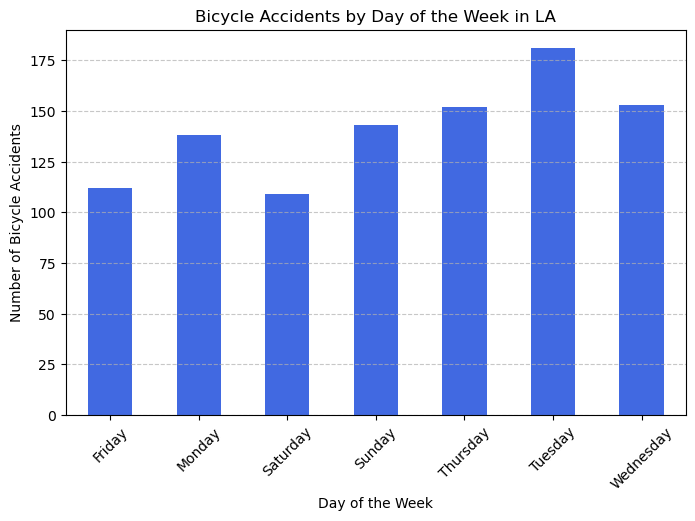

In [8]:
# Plot a bar chart for accidents by day of the week
plt.figure(figsize=(8, 5))
accidents_by_day.plot(kind="bar", color="royalblue")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Bicycle Accidents")
plt.title("Bicycle Accidents by Day of the Week in LA")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

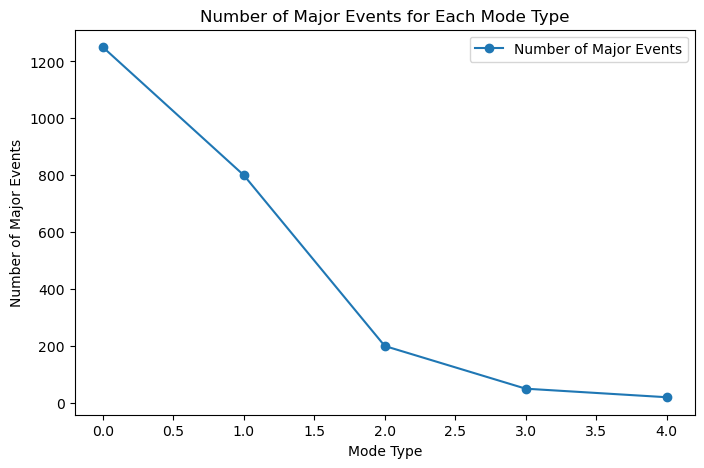

In [9]:
# Assume line_count is a Pandas Series, where the index represents categories and the values represent counts
line_count = pd.Series([1250, 800, 200, 50, 20], index=[0, 1, 2, 3, 4])

# Plot the line chart
plt.figure(figsize=(8, 5))
line_count.plot(kind='line', marker='o', linestyle='-')

# Add title and labels
plt.title("Number of Major Events for Each Mode Type")
plt.xlabel("Mode Type")
plt.ylabel("Number of Major Events")

# Display the legend
plt.legend(["Number of Major Events"])

# Show the chart
plt.show()

In [10]:
# Create a map centered at Los Angeles
la_map = folium.Map(location=[34.05, -118.25], zoom_start=10)

# Add accident locations to the map
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=3,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6
    ).add_to(la_map)

# Save the map as an HTML file
la_map.save("bicycle_accidents_map.html")

# Display map (for Jupyter Notebook users)
la_map

## **Step 9: Analyze the Severity of Bicycle Accidents**

In [11]:
# Count accidents by severity level
severity_counts = df_cleaned["COLLISION_SEVERITY"].value_counts().sort_index()

# Severity levels mapping
severity_labels = {
    1: "Fatal",
    2: "Severe Injury",
    3: "Visible Injury",
    4: "Complaint of Pain"
}

# Replace numerical severity values with descriptions
severity_counts.index = severity_counts.index.map(severity_labels)

# Display the severity breakdown
severity_counts

COLLISION_SEVERITY
Fatal                 14
Severe Injury        109
Visible Injury       506
Complaint of Pain    359
Name: count, dtype: int64

## **Step 10: Visualize Accident Severity Distribution**

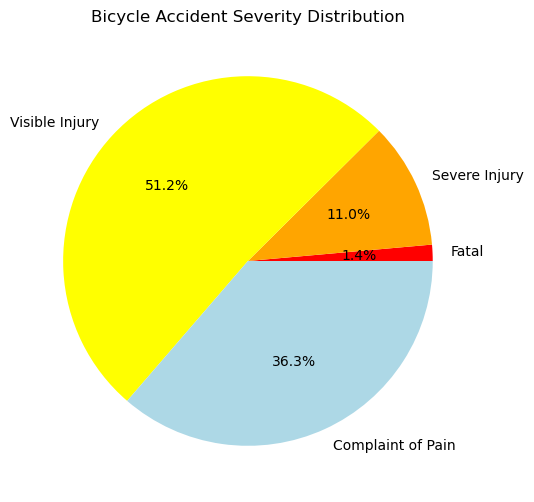

In [12]:
# Plot a pie chart for accident severity
plt.figure(figsize=(6, 6))
severity_counts.plot(kind="pie", autopct="%1.1f%%", colors=["red", "orange", "yellow", "lightblue"])
plt.title("Bicycle Accident Severity Distribution")
plt.ylabel("")  # Hide y-label
plt.show()